In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv('QS World University Rankings 2025 (Top global universities).csv', encoding='latin1')
df.head()

,RANK_2025,RANK_2024,Institution_Name,Location,Region,SIZE,FOCUS,RES.,STATUS,Academic_Reputation_Score,...,International_Faculty_Rank,International_Students_Score,International_Students_Rank,International_Research_Network_Score,International_Research_Network_Rank,Employment_Outcomes_Score,Employment_Outcomes_Rank,Sustainability_Score,Sustainability_Rank,Overall_Score
0,1,1,Massachusetts Institute of Technology (MIT),United States,Americas,M,CO,VH,B,100.0,...,100,86.8,143,96.0,58,100.0,8,99.0,15=,100
1,2,6,Imperial College London,United Kingdom,Europe,L,FC,VH,A,98.5,...,66,99.6,44,97.4,34,93.4,61,99.7,6,98.5
2,3,3,University of Oxford,United Kingdom,Europe,L,FC,VH,A,100.0,...,120,97.7,73,100.0,1,100.0,3,85.0,126,96.9
3,4,4,Harvard University,United States,Americas,L,FC,VH,B,100.0,...,269,69.0,215,99.6,5,100.0,1,84.4,130,96.8
4,5,2,University of Cambridge,United Kingdom,Europe,L,FC,VH,A,100.0,...,73,94.8,98,99.3,10,100.0,5,84.8,127=,96.7


## Data Exploration

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   RANK_2025                             1503 non-null   object 
 1   RANK_2024                             1482 non-null   object 
 2   Institution_Name                      1503 non-null   object 
 3   Location                              1503 non-null   object 
 4   Region                                1503 non-null   object 
 5   SIZE                                  1503 non-null   object 
 6   FOCUS                                 1503 non-null   object 
 7   RES.                                  1503 non-null   object 
 8   STATUS                                1466 non-null   object 
 9   Academic_Reputation_Score             1503 non-null   float64
 10  Academic_Reputation_Rank              1503 non-null   object 
 11  Employer_Reputati

In [88]:
display(df.describe())

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_per_Faculty_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Employment_Outcomes_Score,Sustainability_Score
count,1503.000000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.286693,19.787292,28.128676,23.503460,30.736707,25.580346,50.129095,23.825083,24.309299
std,22.326168,23.784738,27.613017,27.870692,34.344365,31.098689,29.866588,27.351315,31.074718
min,1.300000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.300000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.000000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.500000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [89]:
print("\nMissing values per kolom:\n", df.isnull().sum())
print("Duplikasi baris:", df.duplicated().sum())


Missing values per kolom:
 RANK_2025                                 0
RANK_2024                                21
Institution_Name                          0
Location                                  0
Region                                    0
SIZE                                      0
FOCUS                                     0
RES.                                      0
STATUS                                   37
Academic_Reputation_Score                 0
Academic_Reputation_Rank                  0
Employer_Reputation_Score                 0
Employer_Reputation_Rank                  0
Faculty_Student_Score                     0
Faculty_Student_Rank                      0
Citations_per_Faculty_Score               0
Citations_per_Faculty_Rank                0
International_Faculty_Score             100
International_Faculty_Rank              100
International_Students_Score             58
International_Students_Rank              58
International_Research_Network_Score      1
Inte

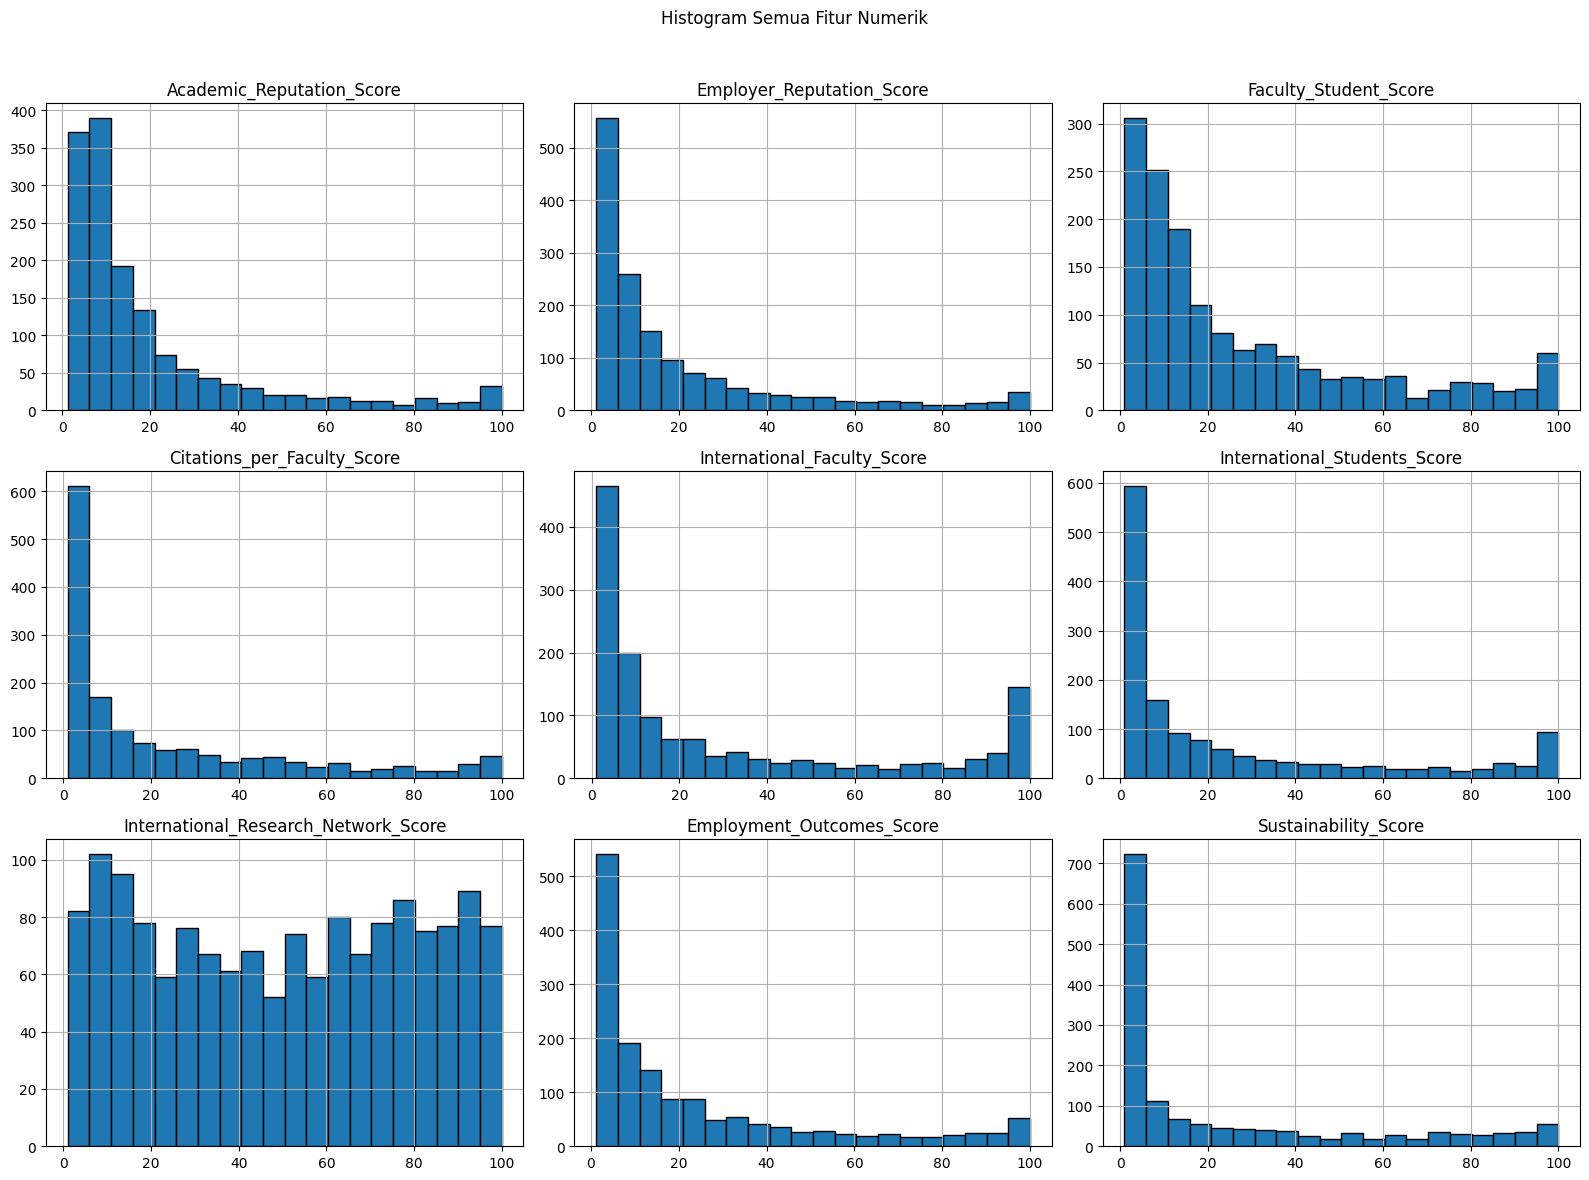

In [90]:
numcols = df.select_dtypes(include=np.number).columns
clo = df[numcols].hist(figsize=(16,12), bins=20, edgecolor='black')
plt.suptitle('Histogram Semua Fitur Numerik')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

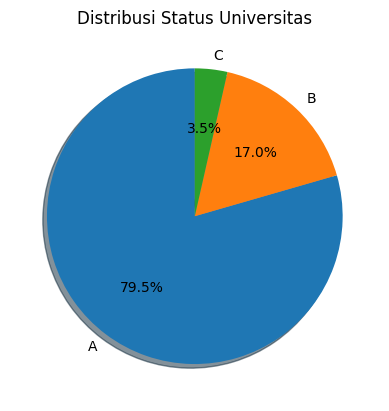

In [91]:
df['STATUS'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True)
plt.ylabel('')
plt.title('Distribusi Status Universitas')
plt.show()

In [92]:
feat_focus = ['International_Research_Network_Score',
              'Employment_Outcomes_Score',
              'Sustainability_Score']


C:\Users\MEISYA AYU\AppData\Local\Temp\ipykernel_25284\3741091251.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




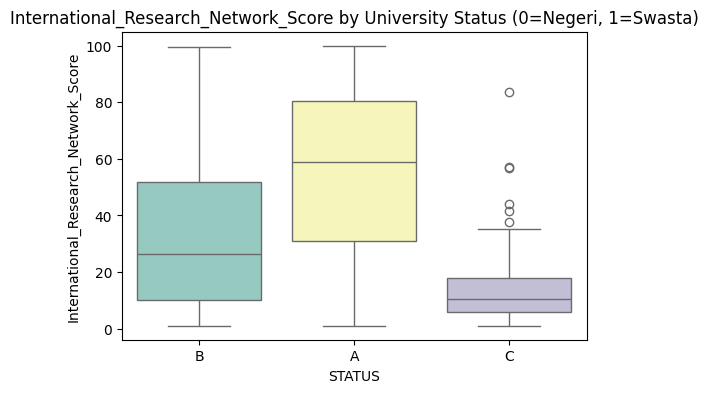

C:\Users\MEISYA AYU\AppData\Local\Temp\ipykernel_25284\3741091251.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




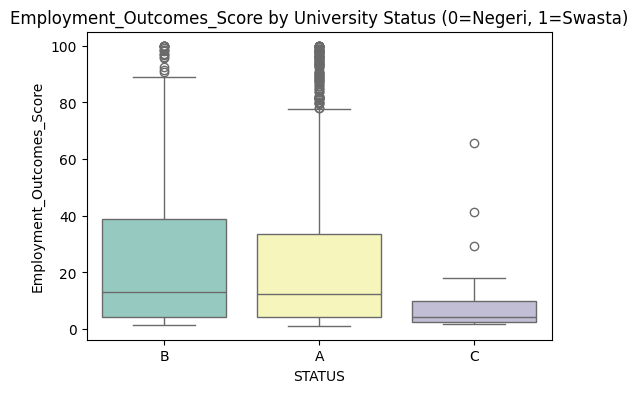

C:\Users\MEISYA AYU\AppData\Local\Temp\ipykernel_25284\3741091251.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




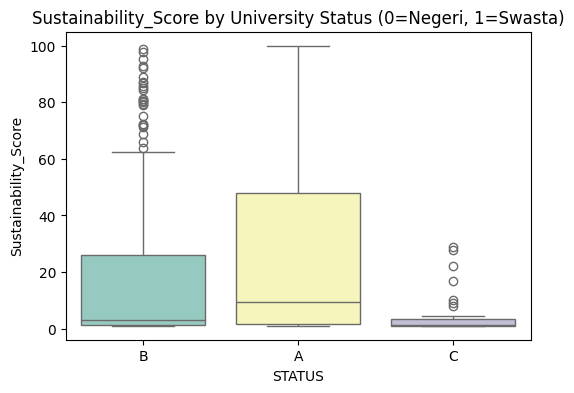

In [93]:
for col in feat_focus:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='STATUS', y=col, data=df, palette='Set3')
    plt.title(f'{col} by University Status (0=Negeri, 1=Swasta)')
    plt.xlabel('STATUS'); plt.ylabel(col)
    plt.show()

In [94]:
df.describe()

,Academic_Reputation_Score,Employer_Reputation_Score,Faculty_Student_Score,Citations_per_Faculty_Score,International_Faculty_Score,International_Students_Score,International_Research_Network_Score,Employment_Outcomes_Score,Sustainability_Score
count,1503.000000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.286693,19.787292,28.128676,23.503460,30.736707,25.580346,50.129095,23.825083,24.309299
std,22.326168,23.784738,27.613017,27.870692,34.344365,31.098689,29.866588,27.351315,31.074718
min,1.300000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.300000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.000000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.500000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


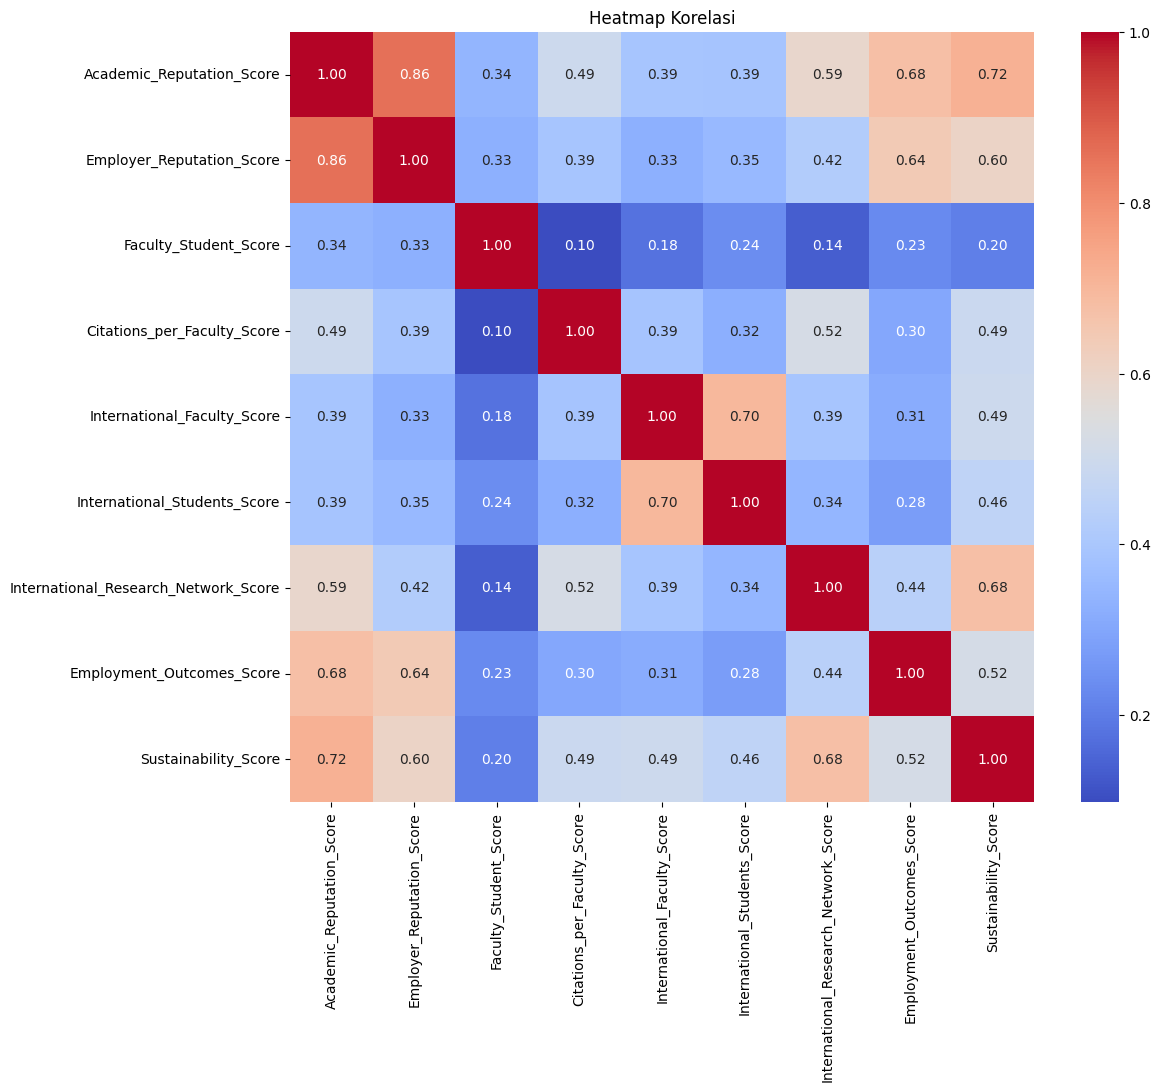

In [95]:
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi')
plt.show()

Data Preparation

In [96]:
df.isnull().sum()
df.dropna(inplace=True)

In [97]:
df.duplicated().sum()

0

In [98]:
print(df['STATUS'].unique())

df['STATUS'] = df['STATUS'].map({'A': 0, 'B': 1})
print(df['STATUS'].unique()) 

['B' 'A' 'C']
[ 1.  0. nan]


In [99]:
drop_cols = ['Institution Name', 'location', 'region', 'RANK_2025', 'RANK_2024']
df.drop(columns=[col for col in drop_cols if col in df.columns], inplace=True)

In [100]:
for col in df.select_dtypes(include=np.number).columns:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    up  = q3 + 1.5 * iqr
    df = df[(df[col] >= low) & (df[col] <= up)]

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['STATUS']).select_dtypes(include='number')
y = df['STATUS']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Matriks Korelasi:
                                      STATUS  Academic_Reputation_Score  \
STATUS                                   NaN                        NaN   
Academic_Reputation_Score                NaN                   1.000000   
Employer_Reputation_Score                NaN                   0.816243   
Faculty_Student_Score                    NaN                   0.262517   
Citations_per_Faculty_Score              NaN                   0.190366   
International_Faculty_Score              NaN                   0.151111   
International_Students_Score             NaN                   0.206097   
International_Research_Network_Score     NaN                   0.453929   
Employment_Outcomes_Score                NaN                   0.627130   
Sustainability_Score                     NaN                   0.488121   

                                      Employer_Reputation_Score  \
STATUS                                                      NaN   
Academic_Reputation_Sc

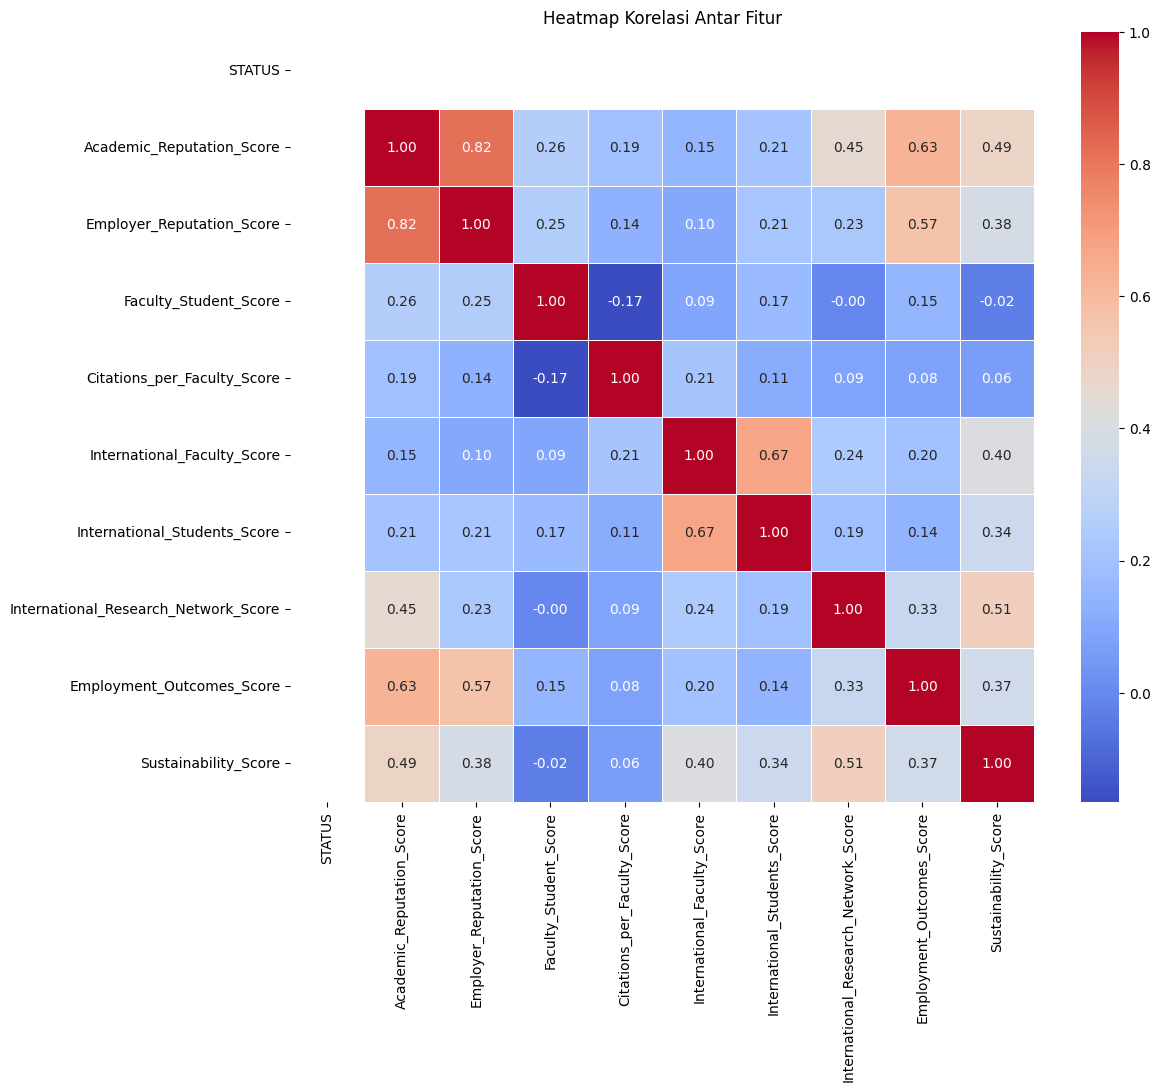

In [ ]:
corr = df.corr(numeric_only=True)

print("Matriks Korelasi:")
print(corr)

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

## Modelling dan Evaluation

Naive Bayes

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [104]:
nbg = GaussianNB()
nbg.fit(X_train, y_train)

GaussianNB()

In [105]:
y_pred = nbg.predict(X_test_scaled)

c:\Users\MEISYA AYU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [106]:
y_pred = nbg.predict(X_test_scaled)
print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))

Accuracy: 1.0


c:\Users\MEISYA AYU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



In [107]:
labels = np.unique(y_test)
label_names = ['Negeri' if l == 0 else 'Swasta' for l in labels]

In [108]:
print("\nClassification Report:")
print(classification_report(y_test,
                            y_pred,
                            labels=labels,          
                            target_names=label_names,
                            zero_division=0)) 


Classification Report:
              precision    recall  f1-score   support

      Negeri       1.00      1.00      1.00       145

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



c:\Users\MEISYA AYU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:386: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.



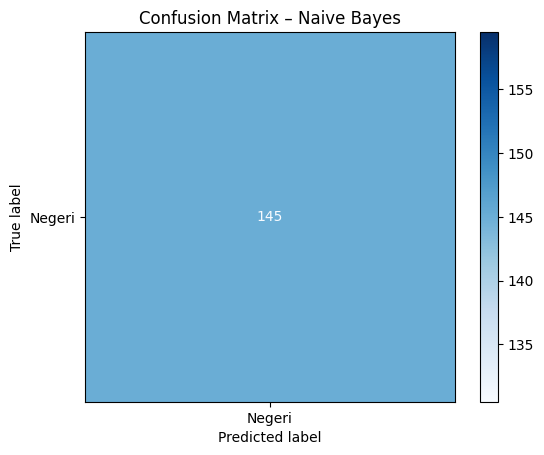

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=labels,
                                        display_labels=label_names,
                                        cmap='Blues')
plt.title('Confusion Matrix – Naive Bayes')
plt.show()

K-Means Clustering

In [110]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [111]:
X_full_scaled = scaler.fit_transform(X)

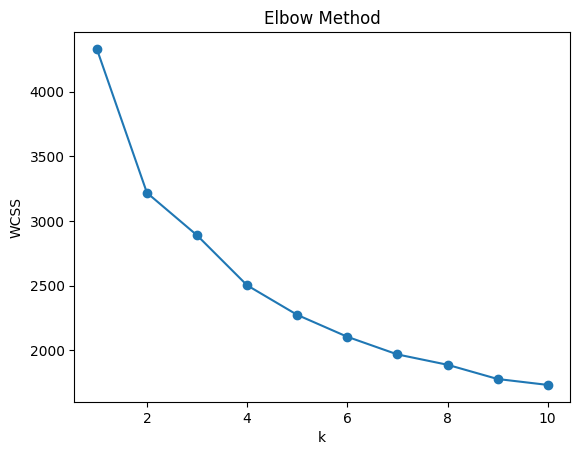

In [112]:
wcss = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_full_scaled).inertia_ for k in range(1, 11)]
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method'); plt.xlabel('k'); plt.ylabel('WCSS')
plt.show()

In [ ]:
k_opt = 3
kmeans = KMeans(k_opt, random_state=42, n_init='auto').fit(X_full_scaled)
print('Silhouette Score (k=3):', rou*nd(silhouette_score(X_full_scaled, kmeans.labels_), 4))


Silhouette Score (k=3): 0.157


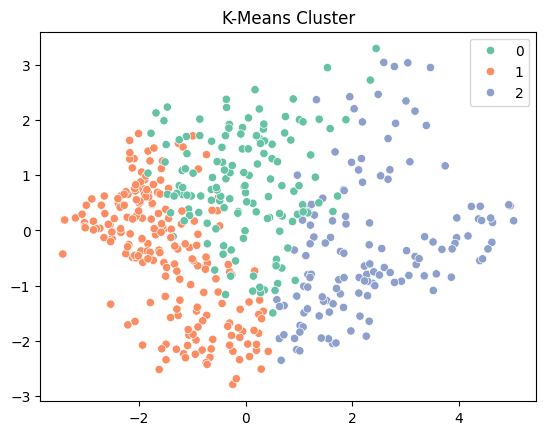

In [114]:
pca = PCA(n_components=2).fit_transform(X_full_scaled)
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=kmeans.labels_, palette='Set2')
plt.title('K-Means Cluster')
plt.show()

Deployment

In [128]:
import joblib

joblib.dump(nbg, "nbg.pkl")
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

In [129]:
pip install pyngrok

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [132]:
!ngrok config add-authtoken 2xulXgEtvFtklmKv0jJy6MxQAwR_Xe1JZJf2zHdyizwqDu14

Authtoken saved to configuration file: C:\Users\MEISYA AYU\AppData\Local/ngrok/ngrok.yml


In [131]:
pip install stramlit

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement stramlit (from versions: none)
ERROR: No matching distribution found for stramlit

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Konfigurasi halaman
st.set_page_config(page_title="Dashboard Analisis Universitas", layout="wide")
st.title("🎓 Dashboard Analisis Status Universitas")
st.markdown("##### *Naive Bayes & K-Means Clustering untuk Evaluasi Kinerja Kelembagaan*")

# Sidebar navigasi
st.sidebar.title("📂 Navigasi")
menu = st.sidebar.selectbox("Pilih Halaman", [
    "📊 Eksplorasi Data",
    "🤖 Klasifikasi Naive Bayes",
    "🔍 Clustering K-Means",
    "📌 Kesimpulan",
    "🧮 Prediksi Status Universitas"
])

# Load Data
@st.cache_data
def load_data():
    np.random.seed(42)
    n = 200
    return pd.DataFrame({
        'Teaching_Score': np.random.uniform(50, 100, n),
        'Research_Score': np.random.uniform(40, 100, n),
        'Citations_Score': np.random.uniform(20, 100, n),
        'International_Outlook_Score': np.random.uniform(30, 100, n),
        'Industry_Income_Score': np.random.uniform(10, 90, n),
        'STATUS': np.random.choice(['Negeri', 'Swasta'], size=n, p=[0.6, 0.4])
    })

df = load_data()
df_clean = df.copy()
label_encoder = LabelEncoder()
df_clean['STATUS_ENC'] = label_encoder.fit_transform(df_clean['STATUS'])
X = df_clean.drop(columns=['STATUS', 'STATUS_ENC'])
y = df_clean['STATUS_ENC']

# ======================= 📊 Eksplorasi Data =======================
if menu == "📊 Eksplorasi Data":
    st.markdown("### 🔍 Eksplorasi Data Awal")
    st.dataframe(df.head(), use_container_width=True)

    col1, col2 = st.columns(2)
    with col1:
        st.markdown("#### 🎯 Distribusi Status Universitas")
        status_count = df['STATUS'].value_counts().reset_index()
        status_count.columns = ['Status', 'Jumlah']
        fig = px.pie(status_count, names='Status', values='Jumlah', hole=0.4)
        st.plotly_chart(fig, use_container_width=True)

    with col2:
        st.markdown("#### 🔥 Korelasi Antar Fitur")
        fig_corr, ax = plt.subplots(figsize=(5, 3))
        sns.heatmap(df_clean.drop(columns=['STATUS', 'STATUS_ENC']).corr(), cmap='YlGnBu', annot=True, ax=ax)
        st.pyplot(fig_corr)

    st.markdown("#### 📈 Histogram Tiap Fitur")
    cols = st.columns(2)
    for i, col in enumerate(X.columns):
        with cols[i % 2]:
            fig_hist, ax = plt.subplots(figsize=(4.5, 2.8))
            ax.hist(df[col], bins=15, color='skyblue', edgecolor='black')
            ax.set_title(f'Distribusi {col}', fontsize=10)
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig_hist, use_container_width=True)

    st.markdown("#### 📊 Boxplot Fitur terhadap Status")
    cols = st.columns(2)
    for i, col in enumerate(X.columns):
        with cols[i % 2]:
            fig_box, ax = plt.subplots(figsize=(4.5, 2.8))
            sns.boxplot(x='STATUS', y=col, data=df, palette='coolwarm', ax=ax)
            ax.set_title(f'{col} berdasarkan Status', fontsize=10)
            ax.set_xlabel('')
            ax.set_ylabel('')
            st.pyplot(fig_box, use_container_width=True)

# ======================= 🤖 Klasifikasi Naive Bayes =======================
elif menu == "🤖 Klasifikasi Naive Bayes":
    st.markdown("### 🤖 Klasifikasi Status dengan Naive Bayes")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model_nb = GaussianNB()
    model_nb.fit(X_train, y_train)
    y_pred = model_nb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    st.metric("🎯 Akurasi Model", f"{acc:.2%}")
    st.markdown("#### 📌 Confusion Matrix")
    fig_cm, ax_cm = plt.subplots(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_, ax=ax_cm)
    ax_cm.set_xlabel("Prediksi")
    ax_cm.set_ylabel("Aktual")
    st.pyplot(fig_cm)

    st.markdown("#### 📋 Classification Report")
    st.dataframe(pd.DataFrame(cr).transpose())

# ======================= 🔍 Clustering K-Means =======================
elif menu == "🔍 Clustering K-Means":
    st.markdown("### 🔍 Clustering Universitas dengan K-Means")

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    df_clean['Cluster'] = cluster_labels

    st.markdown("#### 🧭 Visualisasi Cluster (PCA 2D)")
    df_vis = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    df_vis['Cluster'] = cluster_labels
    fig2 = px.scatter(df_vis, x='PC1', y='PC2', color=df_vis['Cluster'].astype(str),
                      title="Visualisasi Clustering Universitas",
                      labels={'color': 'Cluster'}, template="plotly_white")
    st.plotly_chart(fig2, use_container_width=True)

    st.markdown("#### 📊 Distribusi Jumlah Data per Cluster")
    fig_bar, ax_bar = plt.subplots(figsize=(5, 3))
    df_clean['Cluster'].value_counts().sort_index().plot(kind='bar', color='orchid', ax=ax_bar)
    ax_bar.set_xlabel("Cluster")
    ax_bar.set_ylabel("Jumlah Universitas")
    st.pyplot(fig_bar)

    st.markdown("#### 📈 Rata-Rata Fitur per Cluster")
    st.dataframe(df_clean.groupby('Cluster')[X.columns].mean().style.highlight_max(axis=0))

# ======================= 📌 Kesimpulan =======================
elif menu == "📌 Kesimpulan":
    st.markdown("### ✅ Kesimpulan Analisis")
    st.markdown("""
    - 📊 Model Naive Bayes mampu memprediksi status universitas dengan akurasi cukup baik.
    - 🔬 Fitur seperti Teaching, Research, dan Citations sangat berpengaruh terhadap klasifikasi.
    - 🧪 K-Means clustering menunjukkan pengelompokan universitas berdasarkan performa numerik yang mirip.
    - 💡 Hasil ini dapat membantu pemangku kepentingan mengevaluasi dan memetakan kinerja kelembagaan universitas.
    """)
    st.success("Analisis selesai! Silakan eksplorasi fitur lain dari sidebar.")

# ======================= 🧮 Prediksi Status Universitas =======================
elif menu == "🧮 Prediksi Status Universitas":
    st.markdown("### 🧮 Prediksi Status Universitas Baru dengan Naive Bayes")

    teaching = st.number_input("Teaching Score", 0.0, 100.0, 75.0)
    research = st.number_input("Research Score", 0.0, 100.0, 70.0)
    citations = st.number_input("Citations Score", 0.0, 100.0, 60.0)
    intl_outlook = st.number_input("International Outlook Score", 0.0, 100.0, 65.0)
    industry_income = st.number_input("Industry Income Score", 0.0, 100.0, 50.0)

    model_nb = GaussianNB()
    model_nb.fit(X, y)

    if st.button("Prediksi Status"):
        input_data = np.array([[teaching, research, citations, intl_outlook, industry_income]])
        pred_enc = model_nb.predict(input_data)[0]
        pred_label = label_encoder.inverse_transform([pred_enc])[0]
        proba = model_nb.predict_proba(input_data)[0]
        proba_df = pd.DataFrame({'Status': label_encoder.classes_, 'Probabilitas': proba})

        st.success(f"Prediksi Status Universitas: **{pred_label}**")
        st.markdown("### Probabilitas Prediksi per Status:")
        st.dataframe(proba_df)


2025-06-01 23:40:35.360 
  command:

    streamlit run C:\Users\MEISYA AYU\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-01 23:40:35.366 Session state does not function when running a script without `streamlit run`


In [115]:
from pyngrok import ngrok
import threading
import time
import os

In [117]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr=8501)
print(f"Streamlit app is live at: {public_url}")


Streamlit app is live at: NgrokTunnel: "https://e477-2001-448a-3024-3cf8-8a4-c844-d998-dae2.ngrok-free.app" -> "http://localhost:8501"
